# Classification - Chapter3

In [3]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#dataset-explore---MNIST" data-toc-modified-id="dataset-explore---MNIST-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>dataset explore - MNIST</a></span><ul class="toc-item"><li><span><a href="#import-data-set" data-toc-modified-id="import-data-set-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>import data set</a></span></li><li><span><a href="#data-set-decription" data-toc-modified-id="data-set-decription-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>data set decription</a></span></li><li><span><a href="#typical-train-test-splitting" data-toc-modified-id="typical-train-test-splitting-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>typical train test splitting</a></span></li></ul></li><li><span><a href="#model-selection" data-toc-modified-id="model-selection-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>model selection</a></span><ul class="toc-item"><li><span><a href="#start-from-a-binary-classifier" data-toc-modified-id="start-from-a-binary-classifier-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>start from a binary classifier</a></span></li><li><span><a href="#Stochastic-Gradient-Descent---linear_modl-SGDClassifier" data-toc-modified-id="Stochastic-Gradient-Descent---linear_modl-SGDClassifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Stochastic Gradient Descent - <code>linear_modl SGDClassifier</code></a></span></li><li><span><a href="#model-evaluation-method" data-toc-modified-id="model-evaluation-method-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>model evaluation method</a></span><ul class="toc-item"><li><span><a href="#Cross-Validation-of-online-model---base:clone,-model_selection:cross_val_score" data-toc-modified-id="Cross-Validation-of-online-model---base:clone,-model_selection:cross_val_score-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Cross-Validation of online model - <code>base:clone, model_selection:cross_val_score</code></a></span></li><li><span><a href="#Impact-of-skewed-datasets---model_selection:StratifiedKFold" data-toc-modified-id="Impact-of-skewed-datasets---model_selection:StratifiedKFold-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Impact of skewed datasets - <code>model_selection:StratifiedKFold</code></a></span></li><li><span><a href="#Confusion-Matrix---metrics:confusion_matrix,-model_selection:cross_val_predict" data-toc-modified-id="Confusion-Matrix---metrics:confusion_matrix,-model_selection:cross_val_predict-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Confusion Matrix - <code>metrics:confusion_matrix, model_selection:cross_val_predict</code></a></span></li><li><span><a href="#Precision-and-Recall---metrics:precision_score,-recall_score" data-toc-modified-id="Precision-and-Recall---metrics:precision_score,-recall_score-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Precision and Recall - <code>metrics:precision_score, recall_score</code></a></span></li><li><span><a href="#$F_1$-score---metrics:f1_score" data-toc-modified-id="$F_1$-score---metrics:f1_score-2.3.5"><span class="toc-item-num">2.3.5&nbsp;&nbsp;</span>$F_1$ score - <code>metrics:f1_score</code></a></span></li><li><span><a href="#precision/recall-trade-off---metrics:precision_recall_curve" data-toc-modified-id="precision/recall-trade-off---metrics:precision_recall_curve-2.3.6"><span class="toc-item-num">2.3.6&nbsp;&nbsp;</span>precision/recall trade-off - <code>metrics:precision_recall_curve</code></a></span></li><li><span><a href="#ROC-Curve---metrics:roc_curve" data-toc-modified-id="ROC-Curve---metrics:roc_curve-2.3.7"><span class="toc-item-num">2.3.7&nbsp;&nbsp;</span>ROC Curve - <code>metrics:roc_curve</code></a></span><ul class="toc-item"><li><span><a href="#ROC-vs-PR" data-toc-modified-id="ROC-vs-PR-2.3.7.1"><span class="toc-item-num">2.3.7.1&nbsp;&nbsp;</span>ROC vs PR</a></span></li></ul></li><li><span><a href="#AUC---metrics:roc_auc_score" data-toc-modified-id="AUC---metrics:roc_auc_score-2.3.8"><span class="toc-item-num">2.3.8&nbsp;&nbsp;</span>AUC - <code>metrics:roc_auc_score</code></a></span></li></ul></li><li><span><a href="#RandomForestClassifier---ensamble" data-toc-modified-id="RandomForestClassifier---ensamble-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>RandomForestClassifier - <code>ensamble</code></a></span></li></ul></li><li><span><a href="#Multiclass-Classification" data-toc-modified-id="Multiclass-Classification-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Multiclass Classification</a></span><ul class="toc-item"><li><span><a href="#try-SGDClassifier-again" data-toc-modified-id="try-SGDClassifier-again-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>try SGDClassifier again</a></span></li><li><span><a href="#OneVsOneClassifer---multiclass:OneVsOneClassifier" data-toc-modified-id="OneVsOneClassifer---multiclass:OneVsOneClassifier-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>OneVsOneClassifer - <code>multiclass:OneVsOneClassifier</code></a></span></li><li><span><a href="#inherently-multiclass-classifier---predict_proba()" data-toc-modified-id="inherently-multiclass-classifier---predict_proba()-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>inherently multiclass classifier - <code>predict_proba()</code></a></span><ul class="toc-item"><li><span><a href="#RandomForestClassifier-in-2.4" data-toc-modified-id="RandomForestClassifier-in-2.4-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>RandomForestClassifier in 2.4</a></span></li></ul></li><li><span><a href="#Error-Analysis" data-toc-modified-id="Error-Analysis-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Error Analysis</a></span><ul class="toc-item"><li><span><a href="#cross_val_predict()---&gt;-confusion_matrix()" data-toc-modified-id="cross_val_predict()--->-confusion_matrix()-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span><code>cross_val_predict()</code> --&gt; <code>confusion_matrix()</code></a></span></li></ul></li></ul></li><li><span><a href="#Multilabel-Classification" data-toc-modified-id="Multilabel-Classification-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Multilabel Classification</a></span><ul class="toc-item"><li><span><a href="#KNeighborsClassifier---neighbors:KNeighborsClassifier" data-toc-modified-id="KNeighborsClassifier---neighbors:KNeighborsClassifier-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>KNeighborsClassifier - <code>neighbors:KNeighborsClassifier</code></a></span></li><li><span><a href="#Evaluation-of-multilabel-classification" data-toc-modified-id="Evaluation-of-multilabel-classification-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Evaluation of multilabel classification</a></span><ul class="toc-item"><li><span><a href="#f1_score" data-toc-modified-id="f1_score-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>f1_score</a></span></li></ul></li></ul></li><li><span><a href="#Multioutput-Classification" data-toc-modified-id="Multioutput-Classification-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Multioutput Classification</a></span></li></ul></div>

## dataset explore - MNIST 

### import data set

In [4]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

### data set decription

In [5]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

* `DESCR` describe of the data set
* `data` row<=> instance, col<=>feature
* `target` array with the labels

In [6]:
X, y = mnist["data"], mnist["target"]

In [7]:
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

i.e. there are 70000 images and each has 784 features

In [9]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

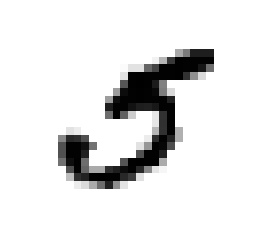

In [10]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(
    some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [11]:
y[36000]

5.0

### typical train test splitting 

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

<span class="burk">some learning algorithms are sensitive to the order of the training instances, and they perform poorly if they get many similar instances in a row.</span>

## model selection 

### start from a binary classifier  

In [95]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

### Stochastic Gradient Descent - `linear_modl SGDClassifier `

* online learning
* large dataset

In [96]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [98]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

### model evaluation method 

#### Cross-Validation of online model - `base:clone, model_selection:cross_val_score` 

In [99]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.869  ,  0.83725,  0.90535])

#### Impact of skewed datasets - `model_selection:StratifiedKFold`

In [100]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))  # prints 0.9502, 0.96565 and 0.96495

0.869
0.83725
0.90535


<div class="girk">
let s make it predict all 5</div><i class="fa fa-lightbulb-o "></i>

In [101]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):

    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [102]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 1.     ,  0.72895,  1.     ])

**100% accuracy by random guess!!!**

#### Confusion Matrix - `metrics:confusion_matrix, model_selection:cross_val_predict`

|  | pred_0 | pred_1 |
|----------|----------------|----------------|
| actual_0 | true negative TN | false positive FP|
| actual_1 | false negative FN | true positive TP|


In [103]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [104]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[47700,  6879],
       [  889,  4532]], dtype=int64)

#### Precision and Recall - `metrics:precision_score, recall_score`


* precision = $\frac{TP}{TP+FP}$ The one we found / all one we found
* recall = $\frac{TP}{TP+FN}$ The one we found / the one  we had to find


In [105]:
from sklearn.metrics import precision_score, recall_score

In [106]:
precision_score(y_train_5, y_train_pred)

0.39716063447550609

In [107]:
recall_score(y_train_5, y_train_pred)

0.83600811658365615


#### $F_1$ score - `metrics:f1_score` 

*harmonic mean* of precision and recall
* <span class="girk">it favors classifiers that have similar precision and recall</span>
* $F_1=\frac{2}{\frac{1}{precision}+\frac{1}{recall}}=\frac{TP}{TP+\frac{FN+FP}{2}}$

In [111]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.53849809885931554

#### precision/recall trade-off - `metrics:precision_recall_curve`

* avoid accepting 0 - increase accuracy
* avoid missing 1 - increase recall
* set `method="decision_function"` to get `y_score`
* use `y_score` and `y_train_5` to get the precision_recall_curve

In [113]:
y_scores = cross_val_predict(
    sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [114]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [117]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

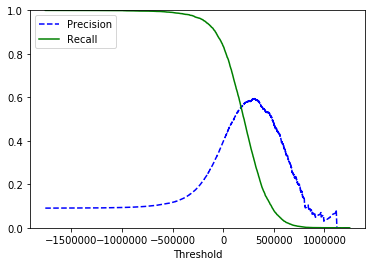

In [118]:
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)

####  ROC Curve - `metrics:roc_curve`

* receiver operating characteristic. 
* **FPR**: false positive rate = 1-TNR
* **TNR**: true positive rate, also called **specificity**
* ROC 

In [119]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [120]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

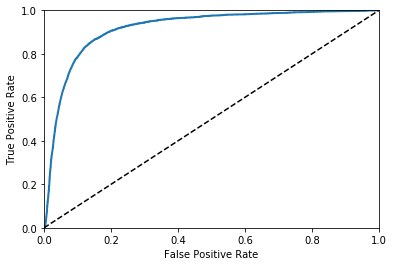

In [121]:
plot_roc_curve(fpr, tpr)
plt.show()

* higher recall (TPR) more FPR

#####  ROC vs PR
* PR when you care more about the false positives than the false negatives
* ROC otherwise and AUC score

#### AUC - `metrics:roc_auc_score` 

* area under the curve (AUC), perfectly 1, randomly 0.5

In [123]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.91740225736699199

### RandomForestClassifier - `ensamble`

* `y_prob = prodict_proba()` rather than `decision_function()` but they work in the same way
* score = probability of positive class `y_prob[:,1]`

In [125]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(
    forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [126]:
y_scores_forest = y_probas_forest[:, 1]  # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,
                                                      y_scores_forest)

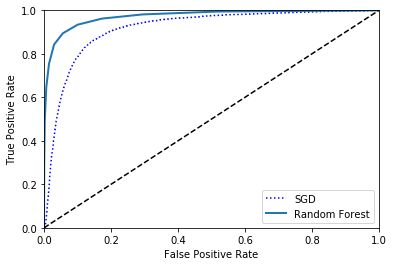

In [127]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="bottom right")
plt.show()

In [128]:
roc_auc_score(y_train_5, y_scores_forest)

0.97279872764494679

## Multiclass Classification 

* *one-versus-all* (OvA) strategy: train several binary classifiers in each individual class and sort their scores. **N classifiers**
    * <span class="girk">automatically use OvA except SVM</span> 
* *one-versus-one* (OvO) stragegy: train several binary classifiers in each pair of individuals **(N*(N-1)/2) classifiers**
    * <span class="girk">SVM scale poorly with the size of the training set.</span> 

### try SGDClassifier again 

In [131]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([ 5.])

In [133]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[ -62703.44639676, -460687.57933386, -319518.34098955,
        -114278.16461143, -468462.8389351 ,   44427.85526221,
        -693906.24797703, -372143.79048941, -536909.69073874,
        -462244.00683201]])

* the highest score is digit 5

In [134]:
np.argmax(some_digit_scores)

5

In [136]:
sgd_clf.classes_
sgd_clf.classes_[5]

5.0

### OneVsOneClassifer - `multiclass:OneVsOneClassifier` 

In [139]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([ 5.])

In [140]:
len(ovo_clf.estimators_)

45

### inherently multiclass classifier - `predict_proba()` 

####   RandomForestClassifier in 2.4

In [141]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([ 5.])

In [142]:
forest_clf.predict_proba([some_digit])

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]])

In [143]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.86157768,  0.86489324,  0.87918188])

In [144]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([ 0.9070186 ,  0.90659533,  0.91193679])

### Error Analysis 

#### `cross_val_predict()` --> `confusion_matrix()` 

In [145]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)

In [146]:
conf_mx

array([[5718,    2,   26,    9,   10,   52,   46,   10,   46,    4],
       [   1, 6446,   48,   29,    7,   43,    6,   14,  136,   12],
       [  55,   40, 5301,  105,   80,   31,   92,   59,  179,   16],
       [  42,   41,  142, 5309,    3,  261,   34,   51,  138,  110],
       [  17,   22,   37,    9, 5368,    9,   56,   32,   83,  209],
       [  71,   37,   37,  176,   79, 4631,  103,   24,  158,  105],
       [  28,   21,   44,    2,   46,   94, 5632,    5,   45,    1],
       [  26,   18,   72,   30,   58,   12,    4, 5782,   17,  246],
       [  44,  152,   67,  142,   20,  170,   49,   27, 5026,  154],
       [  39,   30,   27,   89,  158,   31,    2,  199,   76, 5298]], dtype=int64)

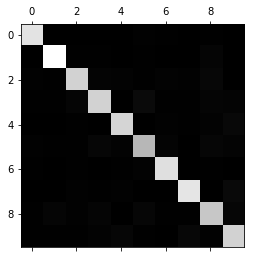

In [147]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

* normalize the `conf_mx`

In [149]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

* fill the correct predict with 0 

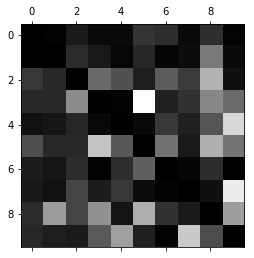

In [150]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

* many 7 are predicts as 9
* 1s are classified correctly

<div class="burk">
Analyzing individual errors can also be a good way to gain insights on what your classifier is doing and why it is failing</div><i class="fa fa-lightbulb-o "></i>

## Multilabel Classification 

* instead of outputting exact one 1, the model has a vector of $\{0,1\}$ 

###  KNeighborsClassifier - `neighbors:KNeighborsClassifier`

let's train a KNN that classifies >=7 against odds

In [31]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()

In [ ]:
knn_clf.fit(X_train, y_multilabel)

In [153]:
knn_clf.predict([some_digit])

array([[False,  True]], dtype=bool)

### Evaluation of multilabel classification 

#### f1_score

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average="macro")

<div class="burk">
* set `average="weighted"` to give each label a weight equal to its support (the number of instances with that target label)</div><i class="fa fa-lightbulb-o "></i>

## Multioutput Classification 
a generalization of multilabel classification where each label can be multiclass

* add noise to 5

In [27]:
import numpy.random as rnd
noise = rnd.randint(0, 100, (len(X_train), 784))
noise_ = rnd.randint(0, 100, (len(X_test), 784))
X_train_mod = X_train + noise
X_test_mod = X_test + noise_
y_train_mod = X_train
y_test_mod = X_test

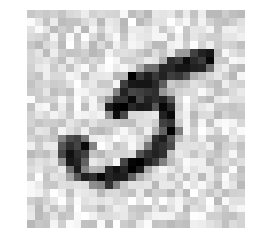

In [36]:
def plot_digit(some_digit):
    some_digit_image = some_digit.reshape(28, 28)
    plt.imshow(
        some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()
    
some_digit = X_train_mod[36000]
plot_digit(some_digit)

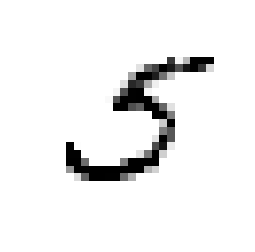

In [37]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_train_mod[36000]])
plot_digit(clean_digit)